# Performance Evaluation Metrics

In this notebook, I'll try and understand some of the performance evaluation metrics that will help in better analysing models.

### Import libraries

First, I import numerous libraries that will be required to work with the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Create dataset

To evaluate and understand various metrics, I'll create a dummy dataset which will have two features `Age` and `Experience`. Based on these features, the output labels will be `0.0` to represent salary less than `$200K` and `1.0` to represent salary more than or equal to `$200K`.

The dataset will be described as follows:
1. **Age:** Ranges from 15 Years to 60 Years
2. **Experience:** Ranges from 0 Years to 15 Years
3. **Salary:** Includes two values, `0.0` and `1.0`

There are a total of 200 values in the dataset.

The procedure of dataset creation is as follows:
1. Create 200 values in total. First 100 will have label as `0.0` and the next will have label `1.0`.
2. For label `0.0`, I will try to keep `Age` and `Experience` on the lower side and vice versa for `1.0`.

First, I create the dataset for age. I use `random.randint` to create random ages. I create two age arrays, one from 15 to 40 years for label `0.0` and the other from 30 to 60 years for label `1.0` while keeping some overlap to make data more realistic. Finally, I combine them together. 

In [2]:
np.random.seed(0)
high_ages = np.random.randint(30, 60, 100)
low_ages = np.random.randint(15, 40, 100)
age = np.concatenate([low_ages, high_ages])

Next, I create the dataset for experiences. I use `random.randint` to create random experience. I create two arrays, one from 0 to 9 years for label `0.0` and the other from 5 to 15 years for label `1.0` while keeping some overlap to make data more realistic. Finally, I combine them together as well.

In [3]:
np.random.seed(0)
high_exp = np.random.randint(5, 15, 100)
low_exp = np.random.randint(0, 9, 100)
exp = np.concatenate([low_exp, high_exp])

Finally, I combine the two columns to create `X`, the features. I also create the labels `y` using first 100 values as `0.0` and last 100 values as `1.0`.

In [4]:
X = pd.concat([pd.Series(exp), pd.Series(age)], axis = 1, names = ['Experience', 'Age'])
y = np.concatenate([np.zeros(100), np.ones(100)])

### Plot created dataset

Now, I'll use **Scatter Plot** from `matplotlib` to plot the created dataset to analyse the dataset. 

All data points with label `1.0` are marked with **GREEN** and data points with label `0.0` are marked with **RED**.

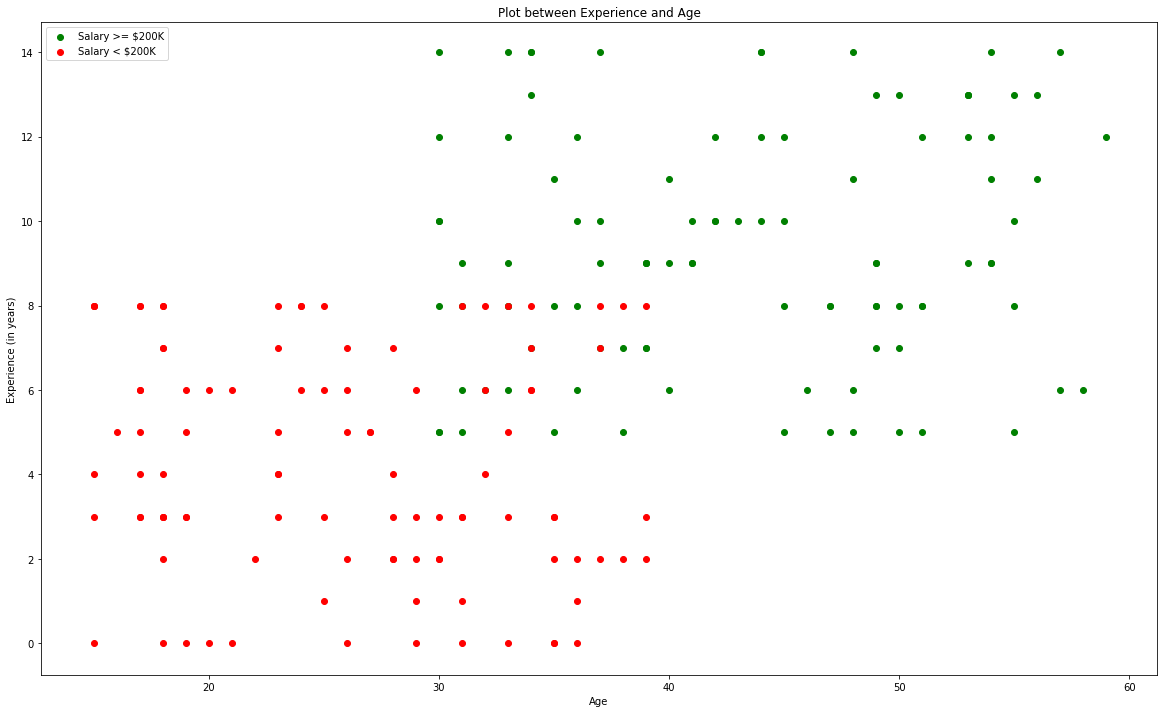

In [5]:
plt.figure(figsize = (20, 12))
plt.scatter(age[y == 1], exp[y == 1], c = 'g', label = 'Salary >= $200K')
plt.scatter(age[y == 0], exp[y == 0], c = 'r', label = 'Salary < $200K')
plt.xlabel('Age')
plt.ylabel('Experience (in years)')
plt.title('Plot between Experience and Age')
plt.legend()

The dataset appears to be good with some overlapping between **RED** and **GREEN** points. This overlap makes the data more realistic as in reality we do not usually find datasets with clearly distinct classes.

### Applying Machine Learning

A linear line might be able to separate the classes upto a great extent. So, I'll use the **Support Vector Classifier** with **lienar kernel** and then analyse its performance using key metrics.

Let's first split the dataset into **70% training data** and **30% testing data**.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

Now, I will train the Support Vector Machine and store its prection inside `y_pred`.

In [7]:
from sklearn.svm import SVC

supportVectorClassifier = SVC(kernel = 'linear', probability = True)
supportVectorClassifier.fit(X_train, y_train)
y_pred = supportVectorClassifier.predict(X_test)

print("Support Vector Machine score: {0:.2f}%".format(supportVectorClassifier.score(X_test, y_test)*100))

Support Vector Machine score: 95.00%


### Analysing trained model using plot

Now, I plot the results of the test data on the figure and define the decision boundary.

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


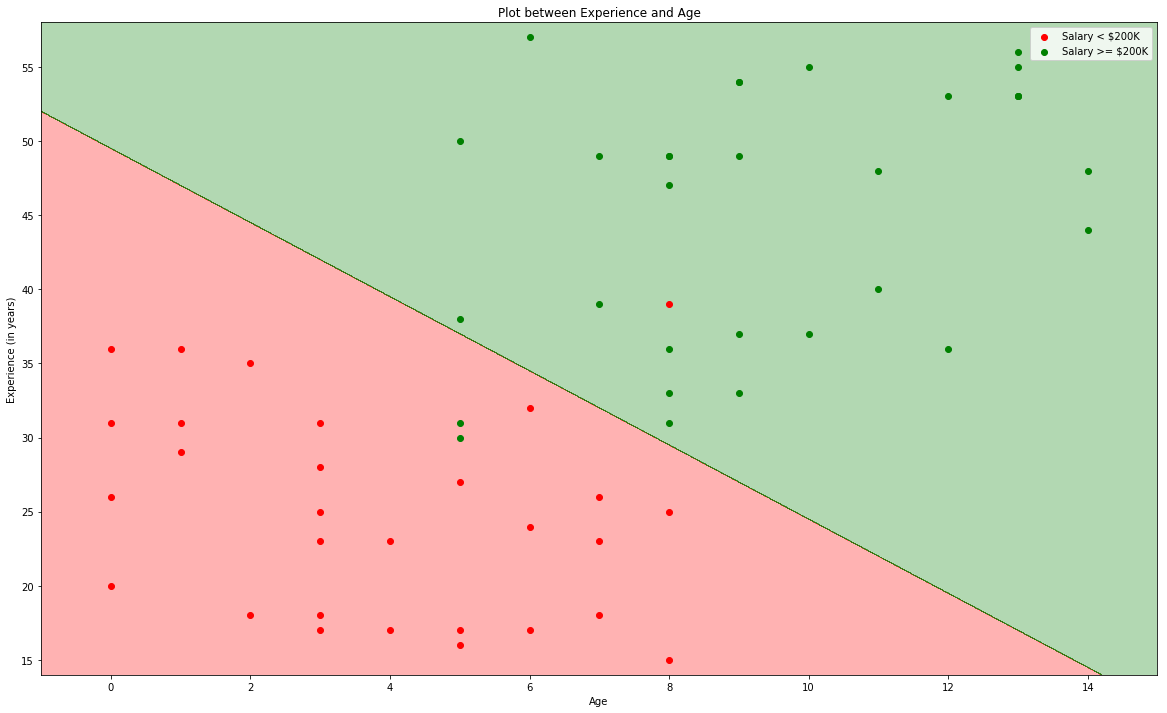

In [8]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['red', 'green'])

X_background = np.linspace(min(X_test), max(X_test), 0.01)
arr_1 = np.arange(start = X_test.iloc[:, 0].min() - 1, stop = X_test.iloc[:, 0].max() + 1, step = 0.01)
arr_2 = np.arange(start = X_test.iloc[:, 1].min() - 1, stop = X_test.iloc[:, 1].max() + 1, step = 0.01)
x_coords, y_coords = np.meshgrid(arr_1, arr_2)
plt.figure(figsize = (20, 12))
plt.contourf(x_coords, 
             y_coords, 
             supportVectorClassifier.predict(np.array([x_coords.ravel(), y_coords.ravel()]).T).reshape(x_coords.shape),
             alpha = 0.3, 
             cmap = cmap)
labels = ['Salary < $200K', 'Salary >= $200K']
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_test.iloc[j == y_test, 0], X_test.iloc[j == y_test, 1],
                c = cmap(i), label = labels[i])
plt.xlabel('Age')
plt.ylabel('Experience (in years)')
plt.title('Plot between Experience and Age')
plt.legend()

The linear boundary does really well at separating the two classes in the test dataset.

However, there are still some values that were not properly classified.

### Confusion Matrix

Let's first take a look at the confusion matrix and analyse if we have any incorrect predictions.

In [9]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[28,  1],
       [ 2, 29]])

Taking a look at the confusion matrix, I see that some values have been wrongly categorized by the model.

### Receiver Operating Characteristic (ROC) Curve

The `Receiver Operating Characteristic` better known as the `ROC Curve` is an excellent method of measuring the performance of a Classification model. The `True Positive Rate` is plot against `False Positive Rate` for the probabilities of a classifier predictions. The area under the plot is calculated.

**More the area under the curve, better is the model at distinguishing the classes.**

The steps are as follows:
1. Calculate probabilities of the classification using `predict_proba`
2. Select a class you want to plot, in this case the second class (with label `1.0`)
3. Using `sklearn.metrics.roc_curve` calculate the `True Positive Rate (TPR)` and the `False Positive Rate(FPR)`.
4. Plot `TPR` on the y-axis and `FPR` on the x-axis.
5. Calculate the area under this curve using `sklearn.metrics.auc`.

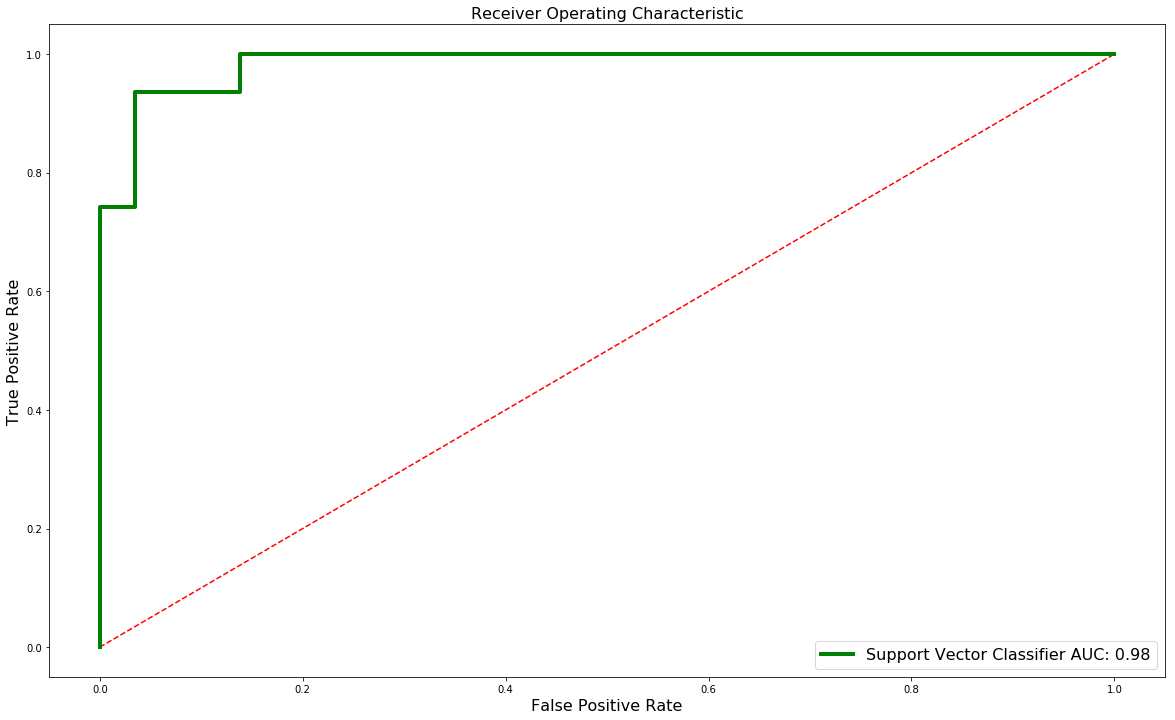

In [10]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--')

probs = supportVectorClassifier.predict_proba(X_test)
# Reading probability of second class
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

label = 'Support Vector Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)

The `Support Vector Classifier` has very high Area Under Curve (`0.98`) and is able to distinguish very well between the two classes.

### Cumulative Accuracy Profile (CAP) Curve

The **CAP Curve** represents the plot between cumulative positive outcomes on the y-axis and the cumulative outcomes on the x-axis.

It includes three plots:
1. **Random Model:** Considering that if prediciton is made randomly, the rise would be linear
2. **Perfect Model:** This model considers that all the class 1 values will be predicted first and then only there will be predictions of class 0
3. **Trained Model:** Based on decreasing probabilities of prediction for class 1, we plot the line graph for the trained model

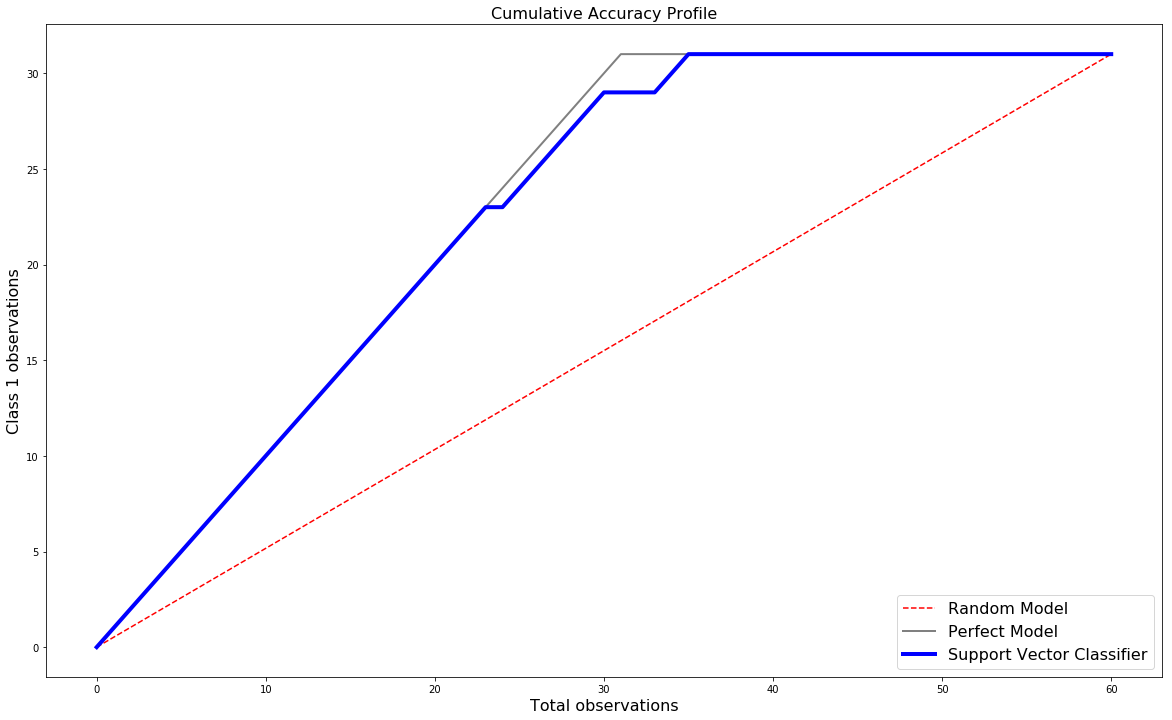

In [11]:
total = len(y_test)
class_1_count = np.sum(y_test)
class_0_count = total - class_1_count
plt.figure(figsize = (20, 12))

# Random Model
plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')

# Perfect Model
plt.plot([0, class_1_count, total], 
         [0, class_1_count, class_1_count], 
         c = 'grey', 
         linewidth = 2, 
         label = 'Perfect Model')

# Trained Model
probs = supportVectorClassifier.predict_proba(X_test)
probs = probs[:, 1]
model_y = [y for _, y in sorted(zip(probs, y_test), reverse = True)]
y_values = np.append([0], np.cumsum(model_y))
x_values = np.arange(0, total + 1)
plt.plot(x_values, 
         y_values, 
         c = 'b', 
         label = 'Support Vector Classifier', 
         linewidth = 4)

# Plot information
plt.xlabel('Total observations', fontsize = 16)
plt.ylabel('Class 1 observations', fontsize = 16)
plt.title('Cumulative Accuracy Profile', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)

#### Area Under Curve Analysis

We use **Area Under Curve** to look at the performance of the model.
1. Calculate the area under the perfect model (aP) till the random model (a).
2. Calculate the area under the prediction model (aR) till the random model (a).
3. Calculate accuracy rate (AR) = aR / aP

The closer the value of `AR` to 1, the better.

In [12]:
# Area under Random Model
a = auc([0, total], [0, class_1_count])

# Area between Perfect and Random Model
aP = auc([0, class_1_count, total], [0, class_1_count, class_1_count]) - a

# Area between Trained and Random Model
aR = auc(x_values, y_values) - a

print("Accuracy Rate for Support Vector Classifier: {}".format(aR / aP))

Accuracy Rate for Support Vector Classifier: 0.9688542825361512


#### Analysis using plot

1. Draw a vertical line at 50% from the x-axis uptil it crosses all models.
2. At the point, where it cuts the prediction model, draw a horizontal line such that it cuts the y-axis.
3. Calculate the percentage of the class 1 identified and the total count of class 1 labels.

Analyse this percentage as follows:
1. Less than 60%: Rubbish Model
2. 60% - 70%: Poor Model
3. 70% - 80%: Good Model
4. 80% - 90%: Very Good Model
5. More than 90%: Too Good to be True

In the fifth case, one must always check for overfitting.

Percentage: 93.55%


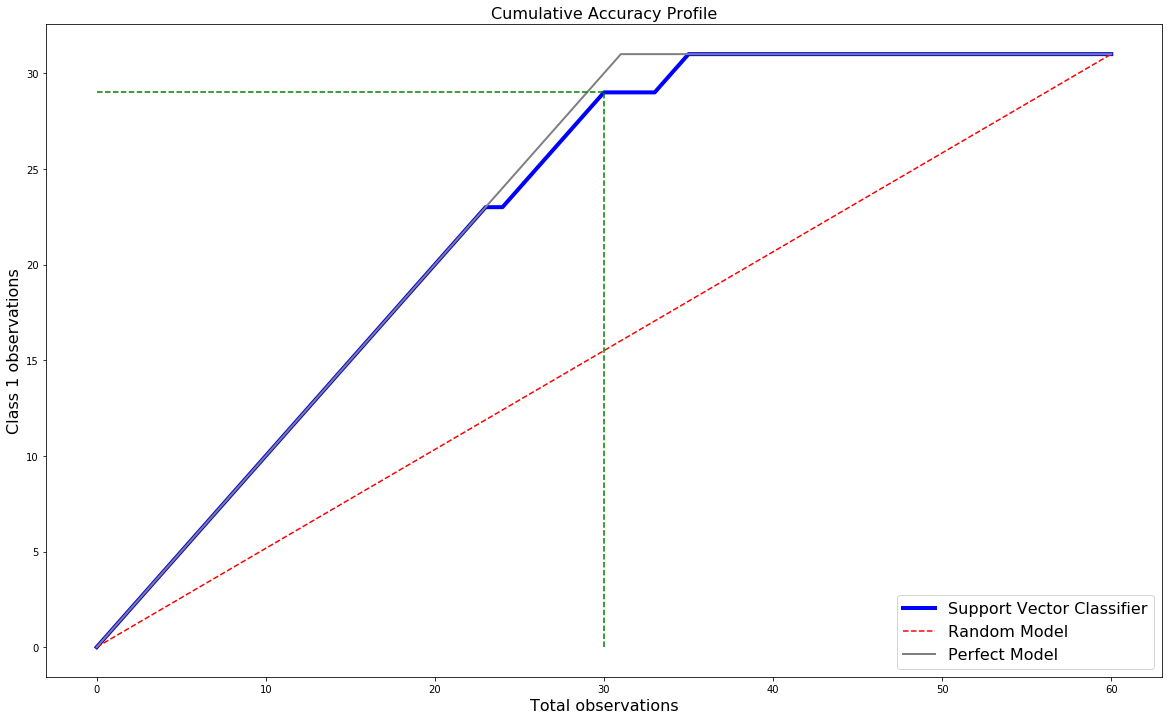

In [13]:
plt.figure(figsize = (20, 12))
plt.plot(x_values, 
         y_values, 
         c = 'b', 
         label = 'Support Vector Classifier', 
         linewidth = 4)
plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')
plt.plot([0, class_1_count, total], 
         [0, class_1_count, class_1_count], 
         c = 'grey', 
         linewidth=2, 
         label = 'Perfect Model')

# Point where vertical line will cut trained model
index = int((50*total / 100))

## 50% Verticcal line from x-axis
plt.plot([index, index], [0, y_values[index]], c ='g', linestyle = '--')

## Horizontal line to y-axis from prediction model
plt.plot([0, index], [y_values[index], y_values[index]], c = 'g', linestyle = '--')

class_1_observed = y_values[index] * 100 / max(y_values)

plt.xlabel('Total observations', fontsize = 16)
plt.ylabel('Class 1 observations', fontsize = 16)
plt.title('Cumulative Accuracy Profile', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)
print("Percentage: {0:.2f}%".format(class_1_observed))

The overall percentage is **93.55%** which is very good. Taking a look at the test dataset, the division seems quite easy and thus our model is able to have such a high percentage. We can easily conclude that there was no overfitting.